In [4]:
import numpy as np
import sys, os, git, lammps_logfile
from matplotlib import pyplot as plt

In [5]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
sys.path.append(git_path+"/docs/inputs/shared-pyplot-files/")
from pyplot_parameters import colors, complete_panel, save_figure, set_boundaries, \
                              add_subplotlabels # set_boundaries
path_in_folder = current_path[len(git_path)+1:]
level = path_in_folder.split("/")[2][-1]
tutorial_name = path_in_folder.split("/")[3]
path_figures = "/docs/sphinx/source/tutorials/figures/level" + level + "/" + tutorial_name + "/"
print("level:" , level, "& tutorial name:", tutorial_name)
print("figures will be saved in", path_figures)

level: 2 & tutorial name: nanosheared-electrolyte
figures will be saved in /docs/sphinx/source/tutorials/figures/level2/nanosheared-electrolyte/


In [6]:
log = lammps_logfile.File("log.lammps")
timestep = 0.5
Time_0 = log.get("Step", run_num=0)*timestep
TotEng_0 = log.get("TotEng", run_num=0)
timestep = 1.0
Time_1 = log.get("Step", run_num=1)*timestep
TotEng_1 = log.get("TotEng", run_num=1)
Time_2 = log.get("Step", run_num=2)*timestep
TotEng_2 = log.get("TotEng", run_num=2)
Time_0 /= 1000 # ps
Time_1 /= 1000 # ps
Time_2 /= 1000 # ps
Time_1 -= 2
Time_2 -= 2

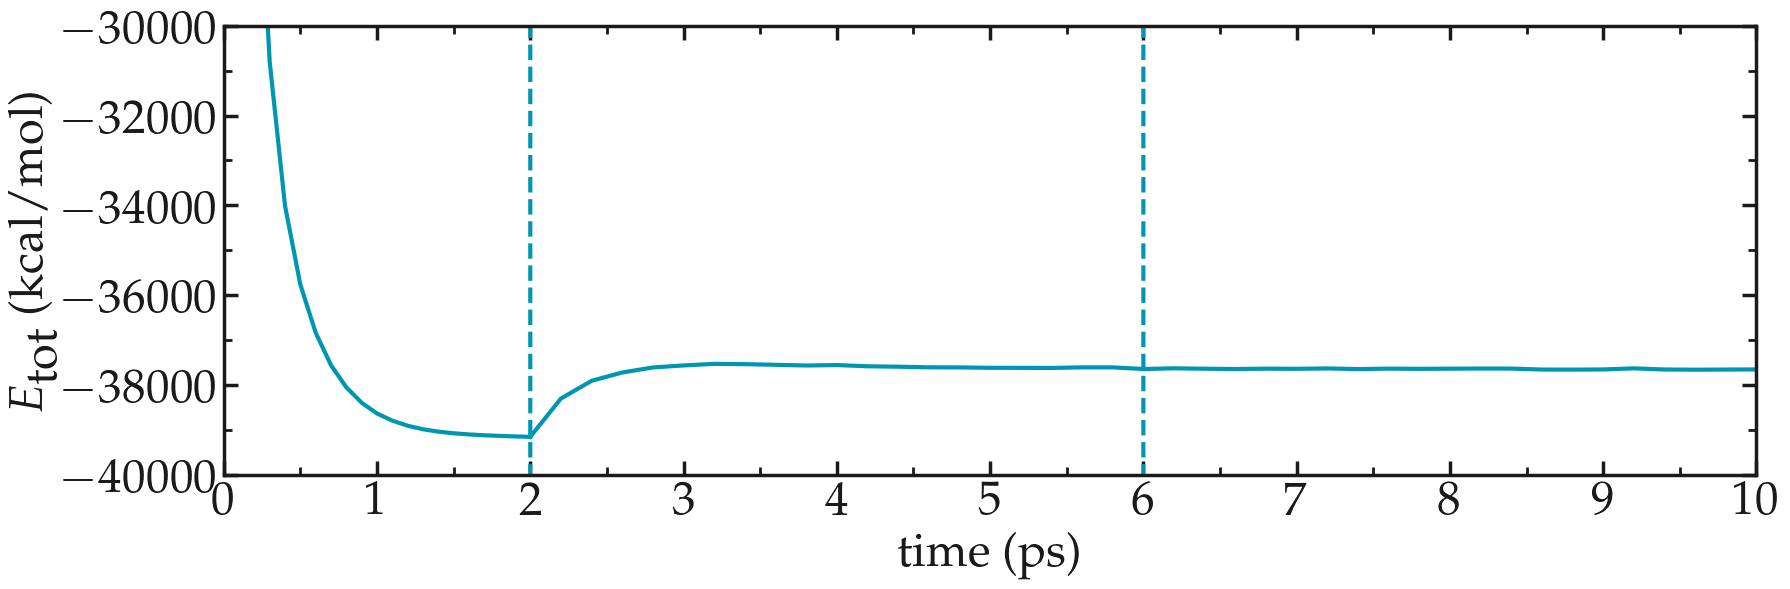

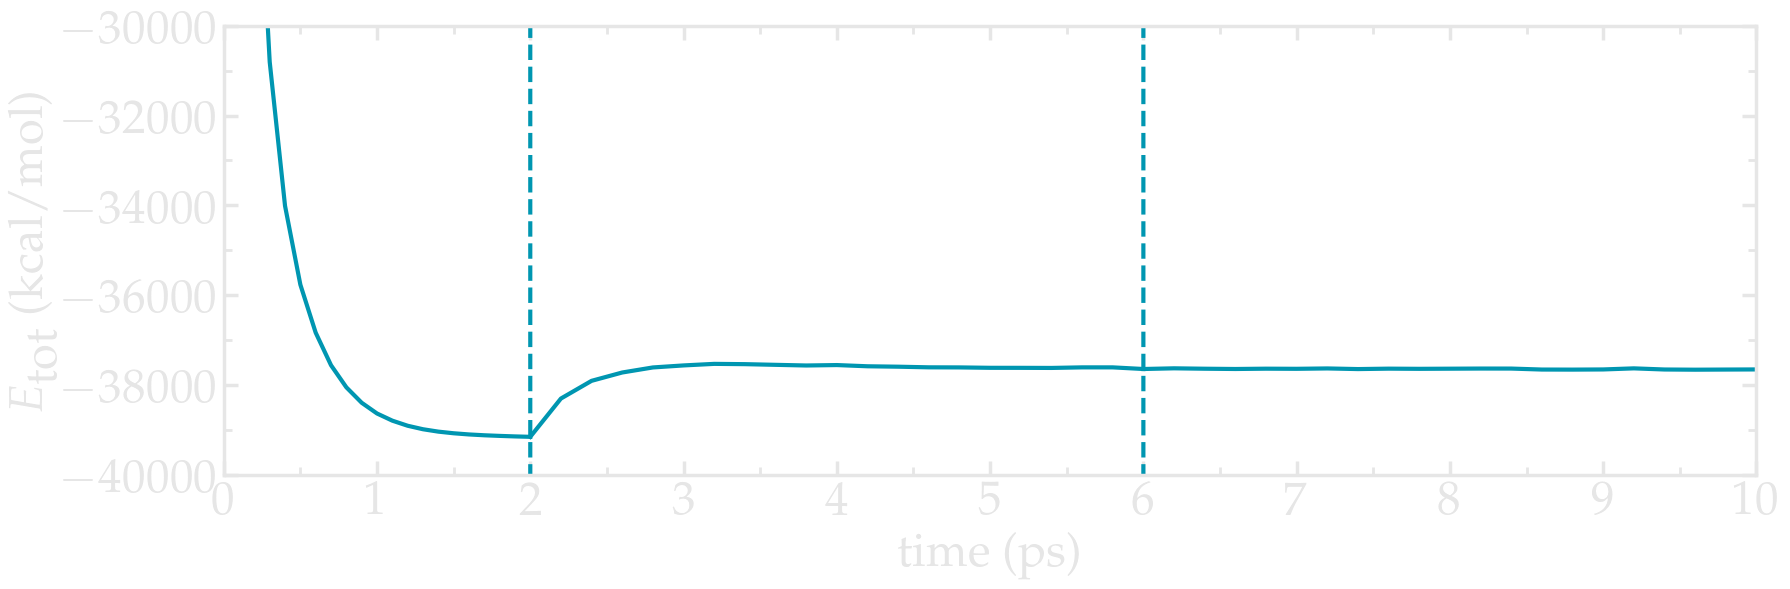

In [10]:
filename = "minimization"
for mode, mygray in zip(['light', 'dark'], [colors["lightgray"], colors["darkgray"]]):    
    fig = plt.figure(figsize=(18,6))
    ax, n, l_tot, c_tot = [], 0, 1, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    x = np.arange(-45000, -20000, 10)
    ax[-1].plot(x*0+2, x, '--', color=colors["myblue"], linewidth=3)
    ax[-1].plot(x*0+6, x, '--', color=colors["myblue"], linewidth=3)
    ax[-1].plot(Time_0, TotEng_0, color=colors["myblue"], linewidth=3)
    ax[-1].plot(Time_1, TotEng_1, color=colors["myblue"], linewidth=3)
    ax[-1].plot(Time_2, TotEng_2, color=colors["myblue"], linewidth=3)
    complete_panel(ax[-1], r'time (ps)', r'$E_\textrm{tot}$ (kcal/mol)', legend=False, axis_color=mygray)
    set_boundaries(plt, x_ticks=np.arange(0, 10.1, 1), x_boundaries=(0, 10),
                   y_ticks=np.arange(-40000, -29000, 2000), y_boundaries=(-40000, -30000))
    #add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
    save_figure(fig, mode, git_path, path_figures, filename)